### 1. Mengimpor library

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

### 2. Mengimpor Dataset

In [3]:
# membaaca dataset 
data = pd.read_csv('asset/insurance.csv')
# menampilkan data teratas dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Pemahaman Terhadap Data

In [4]:
# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 4. Encoding

In [7]:
le = LabelEncoder()# Membuat objek dari encoder

# proses encoding
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data.head()# menampilkan data untuk verifikasi hasil encoding

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### 5. Visualisasi Data

##### - Visualisasi dengan pairplot

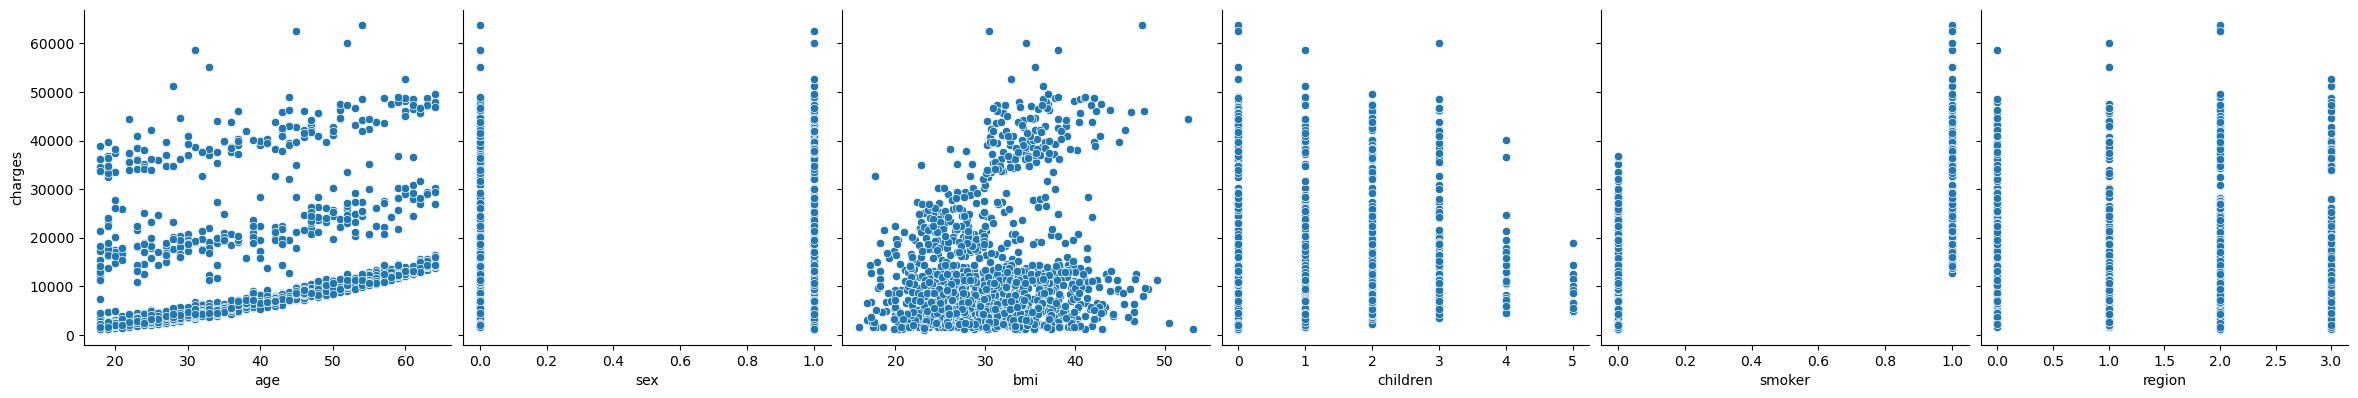

In [9]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

##### - visualisasi dengan heatmap

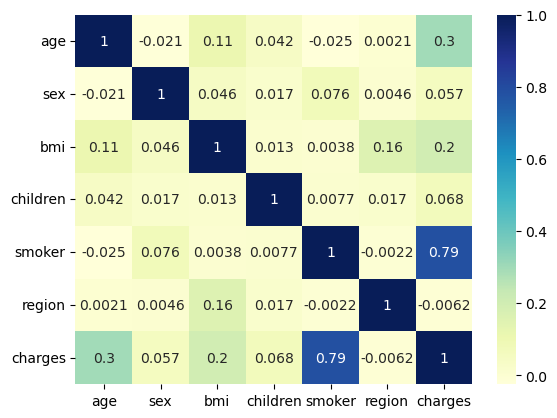

In [11]:
# memfilter kolom yang hanya berisi data numerik
numeric_data = data.select_dtypes(include='number')

# membuat heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

    Jawab : setelah melihat heatmap dari dataset diatas maka bisa disimpulkan bahwa variabel bebas yang digunakan yakni : `age`, `bmi`, dan `smoker` karena memiliki pengaruh yang cukup besar terhadap `charges` (variabel target).

In [12]:
# variabel bebas (independent)
X = data[['age','bmi','smoker']]

# variabel target (dependent)
y = data['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

    Jawab : pada kasus ini akan data latih (train) dan data uji (test) akan di bagi dengan perbandingan 8:2

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Lakukan feature scaling jika diperlukan.

In [52]:
# Mngeinisialisasi objek untuk scaler
sc_train = StandardScaler()
sc_test = StandardScaler()

# List kolom(fitur) yang akan di scaling
numerical_feature = ['age', 'bmi', 'smoker']

# Scaling pada data training
X_train[numerical_feature] = sc_train.fit_transform(X_train[numerical_feature])

# Scaling pada data testing
X_test[numerical_feature] = sc_test.fit_transform(X_test[numerical_feature])

# Menampilkan hasil scaling dari data training
X_train.head()


,age,bmi,smoker
560,0.472227,-1.756525,-0.508747
1285,0.543313,-1.033082,-0.508747
1142,0.898745,-0.943687,-0.508747
969,-0.025379,0.622393,-0.508747
486,1.040918,-1.504893,-0.508747


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [53]:
lr = LinearRegression() # Membuat objek model linear regression menggunakan Scikit-learn

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [54]:
lr.fit(X_train, y_train) # proses latih model multiple linear regression

LinearRegression()

In [55]:
y_pred = lr.predict(X_test) # prediksi pada data uji

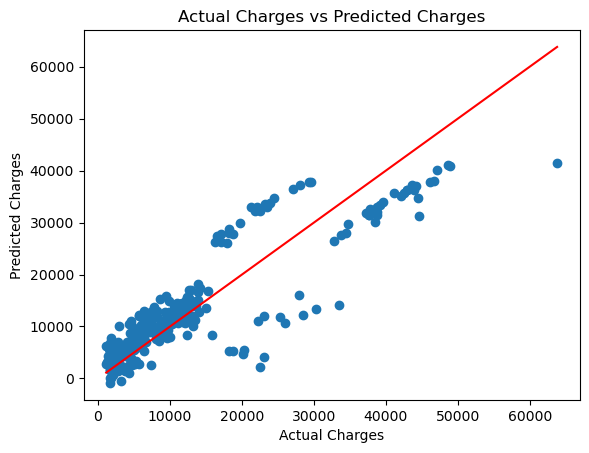

In [56]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(y_test, y_pred)  # Membuat plot scatter antara nilai aktual (y_test) dan nilai prediksi (y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # Membuat garis diagonal untuk referensi (nilai prediksi yang sempurna)
plt.xlabel('Actual Charges')  # Label untuk sumbu x (nilai aktual)
plt.ylabel('Predicted Charges')  # Label untuk sumbu y (nilai prediksi)
plt.title('Actual Charges vs Predicted Charges')  # Judul plot
plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [59]:
# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r2) # Menampilka skor R-squared
print("MSE:", mse) # Menampilka skor MSE
print("MAE:", mae) # Menampilka skor MAE

R-squared: 0.7774741087730282
MSE: 34546862.33706372
MAE: 4254.547761930495
